# Basic Hand Gestures Classification Based on Surface Electromyography (SEMG)

Utilizaremos o método CRISP-DM para realizar a tarefa de classificação dos dados a seguir:

https://archive.ics.uci.edu/ml/datasets/sEMG+for+Basic+Hand+movements




## O que é CRISP-DM?

O *Cross Industry Standard Process for Data Mining* (CRISP-DM) é um modelo de processo com seis fases que descreve naturalmente o ciclo de vida da ciência dos dados. É como um conjunto de guias para ajudar a planear, organizar, e implementar o seu projeto de ciência de dados (ou aprendizagem de máquina). Os 6 guias são:

    Compreensão do negócio - O que é que o negócio precisa?
    Compreensão de dados - Que dados temos / precisamos? Está limpo?
    Preparação dos dados - Como organizamos os dados para a modelagem?
    Modelação - Que técnicas de modelação devemos aplicar?
    Avaliação - Qual o modelo que melhor satisfaz os objetivos do negócio?
    Implantação - Como é que as partes interessadas acedem aos resultados?


## Compreensão do negócio e compreensão dos dados

O *dataset* inclui 2 bases de dados de sinais eletromiográficos de superfície de 6 movimentos da mão utilizando o Sistema EMG da Delsys. Os sujeitos saudáveis realizaram seis movimentos diários de apreensão. A eletromiografia de superfície (sEMG) é um método não invasivo de medição da atividade bioelétrica dos músculos, ele é utilizado tanto no diagnóstico de doenças do sistema muscular como no desenvolvimento de interfaces homem-máquina. 

Os participantes realizaram repetidamente os seis movimentos seguintes:

> a) Esférico: para segurar ferramentas esféricas;

> b) Ponta: para segurar pequenas ferramentas;

> c) Palmar: para agarrar com a palma da mão virada para o objeto;

> d) Lateral: para segurar objetos finos e planos;

> e) Cilíndrico: para segurar ferramentas cilíndricas;

> f) Gancho: para suportar uma carga pesada.



Estão incluídas duas bases de dados diferentes:

* 5 indivíduos saudáveis (dois homens e três mulheres) da mesma idade aproximadamente (20 a 22 anos) conduziram os 6 movimentos 30 vezes cada um. O tempo medido é de 6 segundos. Há um arquivo para cada participante na base de dados.
* 1 sujeito saudável (masculino, 22 anos de idade) conduziu os 6 movimentos 100 vezes cada um, totalizando um total de 600 movimentos, durante 3 dias consecutivos. O tempo medido é de 5 segundos. Há um arquivo apenas para ele. 

O problema apresentado no conjunto é um problema de classificação, onde é necessário identificar a classe (o gesto que está sendo feito) de cada linha. É interessante notar que utilizar o segundo dataset poderá resultar em uma acurácia maior do que o primeiro, pois é possível que um indivíduo possua algum vício na sua execução de algum gesto, assim realizando um mesmo gesto de uma forma muito semelhante todas as vezes que houver repetição dele. Como consequência, devido a uma forte correlação entre os sinais sEMG, uma precisão de classificação excepcional pode ser alcançada, mas um sobreajustamento significativo do classificador pode desfocar as conclusões.

Entretanto o primeiro conjunto de dados também possui uma desvantagem, ele carece no número de repetições de gestos, há apenas 30 repetições de cada gesto, as repetições são vitais para o desenvolvimento de algoritmos robustos de reconhecimento. Também é desaconselhado que se realize o mesmo gesto várias vezes seguidas, pois é provável que o sujeito realize o gesto de uma forma muito semelhante, o que também pode ter como consequência uma precisão de classificação muito alta. Abordagens que reduzem o risco de um sujeito executar cada gesto de forma idêntica são executar sequencialmente uma ordem de gestos ou fazer eles em ordem aleatória, no entanto ainda é vital incluir um grande número de repetições para diminuir o risco. 


Iremos utilizar a seguinte base de dados para o nosso estudo:

```
* 1 sujeito saudável (masculino, 22 anos de idade) conduziu os 6 movimentos 100 vezes cada um, totalizando um total de 600 movimentos, durante 3 dias consecutivos. O tempo medido é de 5 segundos. Há um arquivo apenas para ele. 

```

## Compreensão dos dados e preparação dos dados

### Importação de bibliotecas

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
#from google.colab import drive
import missingno as msno
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy.stats import sem
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import warnings
import sys
warnings.filterwarnings('ignore')
import pysiology.electromyography as electromyography
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#drive.mount('/content/gdrive')
np.random.seed(11)

Thank you for using Pysiology. If you use it in your work, please cite:
Gabrieli G., Azhari A., Esposito G. (2020) PySiology: A Python Package for Physiological Feature Extraction. In: Esposito A., Faundez-Zanuy M., Morabito F., Pasero E. (eds) Neural Approaches to Dynamics of Signal Exchanges. Smart Innovation, Systems and Technologies, vol 151. Springer, Singapore


### Importando e formatando os dados

Nessa seção iremos importar e formatar os dados, o repositório do UCI os disponibiliza em formato .mat, portanto devemos transformar esses dados para que possam ser utilizados com a biblioteca pandas do python

In [2]:
#matfile = '/content/gdrive/My Drive/data/female_1.mat'
matfile = 'data/male_day_1.mat'
mat = loadmat(matfile)
print(mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov 18 12:44:17 2014', '__version__': '1.0', '__globals__': [], 'cyl_ch1': array([[ 0.123201,  0.199706,  0.276211, ...,  0.123201,  0.174205,
         0.403719],
       [ 0.123201,  0.225208,  0.199706, ..., -0.233821,  0.021195,
         0.0977  ],
       [ 0.174205,  0.225208,  0.123201, ...,  0.0977  ,  0.199706,
        -0.029808],
       ...,
       [ 0.0977  ,  0.174205,  0.199706, ...,  0.0977  ,  0.148703,
         0.0977  ],
       [ 0.225208,  0.148703,  0.123201, ...,  0.148703,  0.148703,
         0.0977  ],
       [ 0.123201,  0.199706,  0.072198, ...,  0.174205,  0.021195,
         0.046696]]), 'cyl_ch2': array([[ 0.278708,  0.380739,  0.380739, ...,  0.227693, -0.154923,
         0.125662],
       [ 0.431755,  0.125662,  0.508278, ...,  0.559294,  0.533786,
         0.992925],
       [ 0.584801, -0.0784  ,  0.329724, ..., -0.741602,  0.329724,
        -0.486524],
       ...,
       [ 0.635817,  0.3

### Juntando todos os dados dos 3 dias

In [3]:
matfile = 'data/male_day_1.mat'
mat = loadmat(matfile)
for key,values in mat.items():
    print(key)
    
df = pd.DataFrame(mat['hook_ch1'])
df["hand_mov"] = "hook"

df1 = pd.DataFrame(mat['cyl_ch1'])
df1["hand_mov"] = "cyl"

df2 = pd.DataFrame(mat['tip_ch1'])
df2["hand_mov"] = "tip"

df3 = pd.DataFrame(mat['spher_ch1'])
df3["hand_mov"] = "spher"

df4 = pd.DataFrame(mat['palm_ch1'])
df4["hand_mov"] = "palm"

df5 = pd.DataFrame(mat['lat_ch1'])
df5["hand_mov"] = "lat"

df_all = pd.concat([df,df1,df2,df3,df4,df5])

__header__
__version__
__globals__
cyl_ch1
cyl_ch2
hook_ch1
hook_ch2
tip_ch1
tip_ch2
palm_ch1
palm_ch2
spher_ch1
spher_ch2
lat_ch1
lat_ch2


In [4]:
matfile = 'data/male_day_2.mat'
mat = loadmat(matfile)
for key,values in mat.items():
    print(key)
    
df = pd.DataFrame(mat['hook_ch1'])
df["hand_mov"] = "hook"

df1 = pd.DataFrame(mat['cyl_ch1'])
df1["hand_mov"] = "cyl"

df2 = pd.DataFrame(mat['tip_ch1'])
df2["hand_mov"] = "tip"

df3 = pd.DataFrame(mat['spher_ch1'])
df3["hand_mov"] = "spher"

df4 = pd.DataFrame(mat['palm_ch1'])
df4["hand_mov"] = "palm"

df5 = pd.DataFrame(mat['lat_ch1'])
df5["hand_mov"] = "lat"

df_all1 = pd.concat([df,df1,df2,df3,df4,df5])

__header__
__version__
__globals__
cyl_ch1
cyl_ch2
hook_ch1
hook_ch2
tip_ch1
tip_ch2
palm_ch1
palm_ch2
spher_ch1
spher_ch2
lat_ch1
lat_ch2


In [5]:
matfile = 'data/male_day_3.mat'
mat = loadmat(matfile)
for key,values in mat.items():
    print(key)
    
df = pd.DataFrame(mat['hook_ch1'])
df["hand_mov"] = "hook"

df1 = pd.DataFrame(mat['cyl_ch1'])
df1["hand_mov"] = "cyl"

df2 = pd.DataFrame(mat['tip_ch1'])
df2["hand_mov"] = "tip"

df3 = pd.DataFrame(mat['spher_ch1'])
df3["hand_mov"] = "spher"

df4 = pd.DataFrame(mat['palm_ch1'])
df4["hand_mov"] = "palm"

df5 = pd.DataFrame(mat['lat_ch1'])
df5["hand_mov"] = "lat"

df_all2 = pd.concat([df,df1,df2,df3,df4,df5])

__header__
__version__
__globals__
cyl_ch1
cyl_ch2
hook_ch1
hook_ch2
tip_ch1
tip_ch2
palm_ch1
palm_ch2
spher_ch1
spher_ch2
lat_ch1
lat_ch2


In [6]:
df_all = pd.concat([df_all,df_all1,df_all2])

## Analise de estatística descritiva dos dados

In [7]:
df_all.shape

(1800, 2501)

In [8]:
df_all.describe() 

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,...,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,0.150800,0.149284,0.147499,0.144212,0.143135,0.147499,0.150927,0.149468,0.146578,0.151551,...,0.158195,0.157359,0.157430,0.145827,0.138361,0.139650,0.153336,0.142299,0.145614,0.140160
std,0.086425,0.100784,0.095723,0.093908,0.106889,0.093053,0.123015,0.094398,0.096322,0.104195,...,0.254935,0.274816,0.265947,0.269613,0.305276,0.297503,0.297020,0.277375,0.323763,0.297136
min,-0.539841,-1.100877,-1.228385,-0.794857,-1.789421,-0.616346,-2.069939,-0.922366,-0.896864,-1.381395,...,-1.891428,-2.962496,-2.069939,-3.243014,-2.962496,-3.447027,-3.039001,-2.528968,-6.915249,-4.186575
25%,0.123201,0.097700,0.097700,0.097700,0.097700,0.097700,0.097700,0.123201,0.097700,0.097700,...,0.072198,0.072198,0.097700,0.072198,0.072198,0.072198,0.072198,0.072198,0.072198,0.072198
50%,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,...,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703
75%,0.199706,0.199706,0.199706,0.199706,0.199706,0.199706,0.199706,0.199706,0.199706,0.199706,...,0.225208,0.225208,0.225208,0.225208,0.225208,0.225208,0.225208,0.225208,0.225208,0.225208
max,1.372781,1.959319,0.837247,1.219772,1.015759,1.092263,2.188834,1.219772,1.092263,1.347280,...,2.800873,2.367345,2.724368,1.933817,2.316342,1.857312,3.387410,1.908316,2.341844,2.137830


In [9]:
df_all.dtypes

0           float64
1           float64
2           float64
3           float64
4           float64
             ...   
2496        float64
2497        float64
2498        float64
2499        float64
hand_mov     object
Length: 2501, dtype: object

### Dados Nulos

Sempre é importante verificar se existem dados nulos em um conjunto de dados, para que seja feito seu tratamento ou sua retirada, caso seja necessário.

In [10]:
df_all.isnull().values.any()

False

No entanto aqui observamos que não há dados nulos nesse conjunto.

### Distribuição das classes

In [11]:
# Distribuição das classes
df_all[['hand_mov']].groupby('hand_mov')['hand_mov'].count() # Contando a quantidade de classes e suas respectivas quantidades

hand_mov
cyl      300
hook     300
lat      300
palm     300
spher    300
tip      300
Name: hand_mov, dtype: int64

<AxesSubplot:>

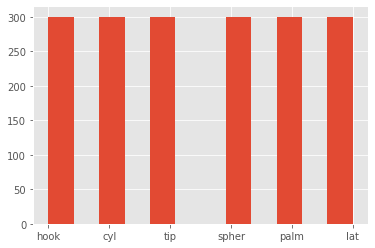

In [12]:
plt.style.use('ggplot')
plt.hist(df_all["hand_mov"],bins=12)
plt.gca()

Temos 6 classes nesse dataset, sendo elas nomeadas como: cyl, hook, tip, palm, spher e lat. Podemos observar que as classes são perfeitamente balanceadas, portanto não há necessidade de qualquer técnica de subsampling ou resampling.

### Matriz de correlação

A correlação é uma estatística muito comum e muito utilizada para analisar se há ligações entre variáveis ou se algum parâmetro pode ser um bom preditor para outro, portanto, tendo em mente que não se pode concluir que correlação implica em causualidade, é interessante plotar a matriz de correlação das variáveis do dataset.

In [13]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_all.drop("hand_mov",axis=1), 25))

Top Absolute Correlations
453  483    0.736354
473  483    0.719204
398  401    0.718001
456  483    0.690818
462  465    0.686015
441  483    0.662099
483  485    0.656877
514  518    0.650912
472  473    0.650725
555  556    0.634434
462  483    0.633687
554  556    0.633059
398  402    0.632042
453  456    0.623015
514  517    0.621993
482  483    0.619750
441  473    0.618563
472  475    0.615063
396  399    0.612066
     400    0.611413
514  515    0.608354
453  482    0.607638
483  515    0.602879
453  473    0.601943
468  483    0.594190
dtype: float64


Não é possível calcular a correlação quando temos uma variável categórica com mais de 2 classes, no entanto podemos realizar um procedimento chamado one-hot-encoding e avaliar a correlação entre as variáveis contínuas e as variáveis criadas com a transformação da categórica. 

Isto é, iremos avaliar se ch1 e ch2 tem correlação com o fato de uma linha ser classificada como cyl ou não, ou se possuem correlação com a classificação de hook ou não, por exemplo.

One-hot Encoding é um tipo de representação vetorial em que todos os elementos de um vetor são 0, exceto um, que tem como valor 1, onde 1 representa um booleano especificando uma categoria do elemento. Por exemplo no conjunto de dados a coluna hand_mov_palm só tera 1 onde a classe for palm. Ele representa a existência ou não dessa classificação, essa é uma maneira de representar variáveis categóricas como números sem denotar uma ordem de importância entre elas.

In [14]:
df_all_ohe = pd.get_dummies(df_all, prefix='hand_mov')
print(df_all_ohe.head())

          0         1         2         3         4         5         6  \
0  0.097700  0.148703  0.199706  0.225208  0.250710  0.199706  0.072198   
1  0.123201  0.123201  0.097700  0.174205  0.148703  0.021195  0.072198   
2  0.072198  0.072198  0.097700  0.174205  0.174205  0.148703  0.148703   
3  0.174205  0.174205  0.199706  0.199706  0.174205  0.225208  0.123201   
4  0.123201  0.199706  0.097700  0.097700  0.174205  0.174205  0.148703   

          7         8         9  ...      2496      2497      2498      2499  \
0  0.046696  0.072198  0.123201  ...  0.786244  0.225208 -0.055310 -0.106313   
1  0.199706  0.123201  0.123201  ...  0.225208  0.276211  0.199706  0.225208   
2  0.123201  0.123201  0.148703  ...  0.097700  0.174205  0.225208  0.199706   
3  0.123201  0.097700  0.072198  ...  0.174205  0.097700  0.123201  0.148703   
4  0.123201  0.097700  0.072198  ...  0.072198  0.021195  0.046696  0.021195   

   hand_mov_cyl  hand_mov_hook  hand_mov_lat  hand_mov_palm  hand_mo

In [15]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df_all_ohe, 50))

Top Absolute Correlations
453   483     0.736354
473   483     0.719204
398   401     0.718001
456   483     0.690818
462   465     0.686015
441   483     0.662099
483   485     0.656877
514   518     0.650912
472   473     0.650725
555   556     0.634434
462   483     0.633687
554   556     0.633059
398   402     0.632042
453   456     0.623015
514   517     0.621993
482   483     0.619750
441   473     0.618563
472   475     0.615063
396   399     0.612066
      400     0.611413
514   515     0.608354
453   482     0.607638
483   515     0.602879
453   473     0.601943
468   483     0.594190
515   518     0.592699
398   408     0.585931
402   408     0.585626
483   489     0.584477
517   518     0.579705
483   484     0.577799
402   407     0.570939
607   608     0.566343
468   470     0.564642
485   486     0.560968
456   485     0.559868
375   377     0.558959
483   518     0.558788
458   470     0.556614
473   482     0.555768
595   596     0.555166
441   472     0.554775
1664  16

Podemos concluir nossa observação, não há correlação relevante entre os preditores e as classes. Apenas entre os preditores entre si, o que deve ser tratado, preferencialmente com algum tipo de feature selection.

## Mais ações de tratamento dos dados

### Feature Selection

A seleção de características é um dos conceitos centrais na aprendizagem de máquinas que tem um grande impacto no desempenho de um modelo. Os recursos de dados que são utilizados para treinar modelos de aprendizagem de máquinas têm uma enorme influência no desempenho que você pode ser alcançado.

A seleção de características é o processo no qual são selecionadas automática ou manualmente as características que mais contribuem para variável de previsão ou saída na qual há interesse. Ter características irrelevantes nos dados pode diminuir a precisão dos modelos e fazer com que o modelo aprenda com base em características não pertinentes.

A seleção de caracteristicas tem os seguintes benefícios:

- Reduz o excesso de ajuste: Dados menos redundantes significam menos oportunidades para tomar decisões baseadas em ruído.
- Melhora a Precisão: Menos dados enganosos significa que a precisão da modelagem melhora.
- Reduz o tempo de treinamento: menos pontos de dados reduzem a complexidade do algoritmo e os algoritmos treinam mais rapidamente.

Utilizaremos PCA para realizar uma redução de dimensionalidade e consequentemente feature selection, o PCA procura substituir as variáveis p (mais ou menos correlacionadas) por k<p combinações lineares não correlacionadas (projeções) das variáveis originais. Isso será feito antes da etapa de treinamento do modelo e apenas poderemos confirmar se o PCA melhora o desempenho do modelo ao realizar testes com um modelo baseline e um modelo que possui a redução de dimensionalidade.



### Tratamento de outliers



Dado que em nosso conjunto de dados pode haver outliers ou ruídos seria interessante realizar um tratamento para tais dados indesejados.

### IsolationForest

É um algoritmo de detecção de anomalias baseado em árvores, baseia-se na modelação dos dados normais de modo a isolar anomalias que são simultaneamente poucas em número e diferentes no espaço de características.

Talvez o hiperparâmetro mais importante no modelo seja o argumento da "contaminação", que é utilizado para ajudar a estimar o número de outliers no conjunto de dados. Este é um valor entre 0,0 e 0,5 e, por padrão, é fixado em 0,1.


In [16]:
np.random.seed(11)

from sklearn.ensemble import IsolationForest

def create_X_y_df(df):
  # retrieve the array
  data = df.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  # split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
  # summarize the shape of the train and test sets
  return X_train, X_test, y_train, y_test 


X_train, X_test, y_train, y_test = create_X_y_df(df_all)
print("Tamanho do X_train antes de remover os outliers: {}".format(X_train.shape))



Tamanho do X_train antes de remover os outliers: (1206, 2500)


In [17]:
np.random.seed(11)

# identify outliers in the training dataset
iso = IsolationForest(contamination=0.05)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

print("Tamanho do X_train após remover os outliers: {}".format(X_train.shape))

Tamanho do X_train após remover os outliers: (1145, 2500)


Após aplicar o método de detecção de outliers é possível verificar uma diminuição na quantidade de linhas no X_train, as linhas retiradas foram identificadas como outliers e removidas. Apenas poderemos confirmar se a retirada dos outliers melhora o desempenho do modelo ao realizar testes com um modelo baseline e um modelo que possui detecção de outliers.

# Modelagem (Métricas de avaliação)


## Recall

Segundo o Google Developers para Machine Learning [https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall] , entendemos que o recall responde a seguinte pergunta: qual proporção de positivos foi identificados corretamente? Em outras palavras, quão bom meu modelo é para prever positivos. Ele é definido como a razão entre verdadeiros positivos sobre a soma de verdadeiros positivos com negativos falsos.

## Precision

Ainda usando o material do Google Developers, precisão é definida como a resposta para a seguinte pergunta: Qual a proporção de identificações positivas foi realmente correta? É a razão entre os verdadeiros positivos sobre verdadeiros positivos + falsos positivos.

## Matriz de Confusão

A matriz de confusão é tabela que mostra as frequências de classificação para cada classe do modelo. 

- Verdadeiro positivo (true positive — TP): ocorre quando no conjunto real, a classe que estamos buscando foi prevista corretamente. 
- Falso positivo (false positive — FP): ocorre quando no conjunto real, a classe que estamos buscando prever foi prevista incorretamente.
- Verdadeiro negativo (true negative — TN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista corretamente. 
- Falso negativo (false negative — FN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista incorretamente. 

## Accuracy

A acurácia é uma métrica para avaliar os modelos de classificação. A acurácia (accuracy score) é a fração das previsões que nosso modelo acertou:

Número de predições corretas / número de predições em total

Para a classificação binária, a precisão também pode ser calculada em termos de positivos e negativos da seguinte forma: 

(TP + TN) / (TP + TN + FP + FN)

A acurácia por si só não conta a história completa quando se trabalha com um conjunto de dados desequilibrado, onde há uma disparidade significativa entre o número de etiquetas positivas e negativas. No entanto como nosso conjunto de dados é relativamente equilibrado é seguro utilizar a acurácia em conjunto com outros métodos.


## f1 score

O f-measure ou f1 score é a média harmônica do precision e recall. Na maioria das situações, você terá um trade-off entre precision e recall. Se seu classificador for otimizado para aumentar um e desfavorecer o outro, a média harmônica diminui rapidamente, no entanto, é maior quando tanto o precision quanto o recall tem valores parecidos.

F-measure tem um significado intuitivo. Ela lhe diz quão preciso é seu classificador (quantas instâncias ele classifica corretamente), bem como quão robusto ele é (ele não perde um número significativo de instâncias).

Com alta precisão, mas baixo recall, seu classificador é extremamente preciso, mas perde um número significativo de instâncias que são difíceis de classificar e isso não seria muito útil. Portanto o f-measure será a métrica principal que iremos utilizar para comparar os algoritmos de classificação.


## Funções Auxiliares

### KFold

Para todos os modelos iremos realizar um Stratified KFold com 10 folds, onde ao se selecionar os indices de treino e teste serão normalizados os dados e depois aplicado o PCA para o X_train e X_test, isso será feito tanto para os dados sem a retirada de outliers como para o conjunto de dados com presença de outliers para fins comparativos. Utilizamos o Stratified Kfold com o fim de manter a proporção entre as classes e não causar desbalanceamento no treinamento do modelo.

In [18]:
np.random.seed(11)

def KFolds_outlier(df_all, model):
  outlier_list = []
  normal_list = []
  normal_f1_list = []
  normal_class_repo_list = []

  normal_conf_matrix = []
  outlier_conf_matrix = []
    
  outlier_f1_list = []
  outlier_class_repo_list = []

  df = shuffle(df_all)
  data = df.values
  X, y = data[:, :-1], data[:, -1]

  i = 0
  kf = StratifiedKFold(n_splits=10,random_state=11, shuffle=True)
  kf.get_n_splits(X,y)

  print(kf)

  for train_index, test_index in kf.split(X,y):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    i = i + 1
    
    pca = PCA(.50)

    scaler = StandardScaler()

    # Fit on training set only.
    scaler.fit(X_train)
    # Apply transform to both the training set and the test set.
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)

    print("--------------------------------------------------------")
    print("Fold número: ", i)
    print("Tamanho do X_train antes de remover os outliers: {}".format(X_train.shape))

    modelo = model
    modelo.fit(X_train,y_train)

    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred, labels=["cyl", "hook", "tip", "palm", "spher", "lat"])
    class_repo = classification_report(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,labels=["cyl", "hook", "tip", "palm", "spher", "lat"], average='weighted')
    
    print("Acurácia antes retirada de outliers: ", acc)
    print("F1-Score antes retirada de outliers: ", f1)
    normal_list.append(acc)
    normal_conf_matrix.append(conf_matrix)
    normal_f1_list.append(f1)
    normal_class_repo_list.append(class_repo)
    
    # identify outliers in the training dataset
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(X_train)
    # select all rows that are not outliers
    mask = yhat != -1
    X_train, y_train = X_train[mask, :], y_train[mask]
    
    print("Tamanho do X_train após remover os outliers: {}".format(X_train.shape))

    modelo = model
    modelo.fit(X_train,y_train)

    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred, labels=["cyl", "hook", "tip", "palm", "spher", "lat"])
    class_repo = classification_report(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,labels=["cyl", "hook", "tip", "palm", "spher", "lat"], average='weighted')
    
    print("Acurácia após retirada de outliers: ", acc)
    print("F1-Score após retirada de outliers: ", f1)
    
    outlier_list.append(acc)
    outlier_conf_matrix.append(conf_matrix)
    outlier_f1_list.append(f1)
    outlier_class_repo_list.append(class_repo)

  return normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix, normal_f1_list, outlier_f1_list, normal_class_repo_list, outlier_class_repo_list

### GridSearch

O GridSearch está presente para encontrar a melhor variação paramétrica para cada modelo, nele estamos utilizando o f1_score como métrica principal.

In [19]:
from sklearn.metrics import make_scorer
np.random.seed(11)

def grid_search(model, param_grid, n_folds, X, y):
  scorer = make_scorer(f1_score, average = 'weighted')
  #use gridsearch to test all values for n_neighbors
  gscv = GridSearchCV(model, param_grid, cv=n_folds, scoring=scorer, verbose=2)
  #fit model to data
  gscv.fit(X, y)
  return gscv.best_params_, gscv.best_score_


### Boxplot

Iremos apresentar o boxplot com a variação e a média dos folds para o kfold que será realizado em cada modelo.

In [20]:
def boxplot_results(normal_list, outlier_list):
  results_kfold = pd.DataFrame()
  results_kfold["mean"] = normal_list
  results_kfold["method"] = "with outliers"

  results_kfold1 = pd.DataFrame()
  results_kfold1["mean"] = outlier_list
  results_kfold1["method"] = "without outliers"

  results_kfold = pd.concat([results_kfold,results_kfold1])
  results_kfold.head()

  fig, ax = plt.subplots(figsize=(12,10)) 
  ax = sns.boxplot(x="method", y="mean", hue="method", data=results_kfold, palette="Set1")
  plt.show()

### Confusion Matrix

Também será apresentada uma matriz de confusão para o melhor f1_score encontrado.

In [21]:
def conf_matrix(conf_matrix, list_scores):
  index_best = list_scores.index(max(list_scores))
  conf_matrix_best = conf_matrix[index_best]

  fig, ax = plt.subplots(figsize=(15,10)) 
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(conf_matrix_best, annot=True, annot_kws={"size": 10}) # font size

  plt.show()

### Repeated KFold

Será realizado um KFold com repetição a fim de comparação com o kfold realizado anteriormente, ele terá também 10 folds, mas será repetido 5 vezes. Nesse kfold com repetição não haverá nenhum tipo de tratamento de dados, para assim podermos avaliar se realmente é mais vantajoso realizar uma redução de dimensionalidade nos nossos dados.

In [22]:
np.random.seed(11)

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats, model):
    # prepare the cross-validation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=11)
    # create model
    model = model
    scorer = make_scorer(f1_score, average = 'weighted')
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=scorer, cv=cv, n_jobs=-1)
    return scores

def repeated_KFold(model, df_all):
  # create datasetdata = df_all.values
  data = df_all.values
  X, y = data[:, :-1], data[:, -1]
  # configurations to test
  repeats = range(1,6)
  results = list()
  modelo = model

  for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, y, r, modelo)
    # summarize
    print('>%d mean=%.4f std=%.3f' % (r, mean(scores), std(scores)))
    # store
    results.append(scores)
  # plot the results
  pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
  pyplot.show()


  mean_scores = []
  for i in results:
    mean_scores.append(mean(i))
  best_score = np.amax(mean_scores)

  return best_score

### Avaliação modelo

Função que imprime a acurácia e o f1 score de um modelo, retorna o f1 score e a sua matriz de confusão.

In [23]:
np.random.seed(11)

def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    acc = accuracy_score(test_labels, y_pred)
    f1 = f1_score(y_test, y_pred,labels=["cyl", "hook", "tip", "palm", "spher", "lat"], average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred, labels=["cyl", "hook", "tip", "palm", "spher", "lat"])
    print('Model Performance')
    print('Accuracy = {:0.5f}%.'.format(acc))
    print('F1 = {:0.5f}%.'.format(f1))
    
    return f1, conf_matrix

### Criar X_train, X_test, y_train e y_test

In [24]:
np.random.seed(11)

def create_X_y_df(df):
  # retrieve the array
  data = df.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  # split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
  # summarize the shape of the train and test sets
  return X_train, X_test, y_train, y_test 


# Algoritmos de Classificação (Modelagem)

In [25]:
dict_results = {}

## KNN

O algoritmo KNN assume que coisas similares existem em grande proximidade. Em outras palavras, coisas semelhantes estão próximas uma da outra, ele depende desta suposição ser verdadeira o suficiente para que seja útil. O KNN captura a idéia de semelhança (às vezes chamada distância, proximidade ou proximidade) a partir do cálculo da distância entre pontos, a distância em linha reta (também chamada de distância Euclidiana) é uma escolha popular e familiar para calcular a proximidade entre pontos no KNN e, assim, realizar uma tarefa de classificação em diferentes grupos.


Abaixo iremos aplicar o algoritmo KNN diretamente nos dados que foram separados em treino e teste para termos um modelo baseline.

### Modelo baseline

In [26]:
np.random.seed(11)

X_train, X_test, y_train, y_test = create_X_y_df(df_all)

print("Modelo baseline")
base_model = KNeighborsClassifier()
base_model.fit(X_train, y_train)
base, base_conf_matrix = evaluate(base_model, X_test, y_test)



Modelo baseline
Model Performance
Accuracy = 0.17677%.
F1 = 0.07752%.


Temos um f1_score bastante baixo inicialmente

### Baseline + PCA 


Abaixo iremos aplicar o PCA no treino e teste do modelo baseline e realizar seu fit novamente para ver se há alguma melhoria de desempenho.

In [27]:
np.random.seed(11)

pca = PCA(.50)

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print("Modelo com pca")
base_model = KNeighborsClassifier()
base_model.fit(X_train, y_train)
base_f1, base_conf_matrix = evaluate(base_model, X_test, y_test)

dict_results['knn_baseline'] = base_f1
print('Melhoria de {:0.5f}%.'.format( 100 * (base_f1 - base) / base))

Modelo com pca
Model Performance
Accuracy = 0.19865%.
F1 = 0.14517%.
Melhoria de 87.27547%.


Há uma melhora significativa de desempenho utilizando o PCA.

### Grid Search para achar melhor n de k


Para selecionar o K adequado para nossos dados, executamos o algoritmo KNN várias vezes com diferentes valores de K e escolhemos o K que reduz o número de erros que encontramos, mantendo a capacidade do algoritmo de fazer previsões com precisão quando são fornecidos dados que não foram vistos antes.

1. À medida que diminuimos o valor de K para 1, nossas previsões se tornam menos estáveis. Basta pensar por um minuto, imagine K=1 e temos um ponto de consulta cercado por vários vermelhos e um verde, mas o verde é o único vizinho mais próximo. Razoavelmente, pensaríamos que o ponto de interrogação é provavelmente vermelho, mas porque K=1, KNN prevê incorretamente que o ponto de interrogação é verde.

2. Inversamente, à medida que aumentamos o valor de K, nossas previsões se tornam mais estáveis devido à votação por maioria / média e, portanto, mais propensas a fazer previsões mais precisas (até um certo ponto). Eventualmente, começamos a testemunhar um número crescente de erros. É neste ponto que sabemos que elevamos demais o valor de K.

Iremos variar k entre 3 e 31 para o nosso problema.

In [28]:
np.random.seed(11)

data = df_all.copy()
data = data.values
X, y = data[:, :-1], data[:, -1]

pca = PCA(.50)

# Fit on training set only.
scaler.fit(X)
# Apply transform to both the training set and the test set.
X = scaler.transform(X)
pca.fit(X)
X = pca.transform(X)


knn = KNeighborsClassifier()
best_params, best_score = grid_search(knn, {'n_neighbors': np.arange(3, 31, 2)},10, X,y)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END .....................................

[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=25; total time=   0.0s
[CV] END .....................................n_neighbors=25; total time=   0.0s
[CV] END .....................................n_neighbors=25; total time=   0.0s
[CV] END .....................................n_neighbors=25; total time=   0.0s
[CV] END .....................................n_neighbors=25; total time=   0.0s
[CV] END .....................................n_neighbors=25; total time=   0.0s
[CV] END .....................................n_neighbors=25; total time=   0.0s
[CV] END .....................................n_neighbors=25; total time=   0.0s
[CV] END ...................

In [29]:
#check mean score for the top performing value of n_neighbors
best_score

0.18823898202063633

Com a variação paramétrica conseguimos uma melhoria em relação ao modelo inicial.

In [30]:
print('Melhoria de {:0.5f}%.'.format( 100 * (best_score - base_f1) / base_f1))

Melhoria de 29.66651%.


In [31]:
#check top performing n_neighbors value
knn_best = best_params
print("Melhores parâmetros: {}".format(knn_best))

Melhores parâmetros: {'n_neighbors': 3}


### K-fold com e sem a retirada de outliers

A seguir realizaremos uma validação cruzada com o k-fold para avaliar o desempenho do algoritmo, iremos fazer a validação com a base completa e com a base com a retirada de outliers para fins de comparação. Usaremos os parâmetros ótimos encontrados pelo gridSearch.

In [32]:
np.random.seed(11)

knn = KNeighborsClassifier(**knn_best)

normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix, normal_f1_list, outlier_f1_list, normal_class_repo_list, outlier_class_repo_list = KFolds_outlier(df_all, knn)

StratifiedKFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (1620, 104)
Acurácia antes retirada de outliers:  0.18333333333333332
F1-Score antes retirada de outliers:  0.14510993069156758
Tamanho do X_train após remover os outliers: (1539, 104)
Acurácia após retirada de outliers:  0.18333333333333332
F1-Score após retirada de outliers:  0.14510993069156758
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (1620, 105)
Acurácia antes retirada de outliers:  0.16111111111111112
F1-Score antes retirada de outliers:  0.13752394558846173
Tamanho do X_train após remover os outliers: (1539, 105)
Acurácia após retirada de outliers:  0.16111111111111112
F1-Score após retirada de outliers:  0.13752394558846173
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes 

In [33]:
print("Melhores desempenhos")
print("Com outliers:",max(normal_f1_list))
print("Sem outliers:",max(outlier_f1_list))


Melhores desempenhos
Com outliers: 0.18057073875218035
Sem outliers: 0.18057073875218035


In [34]:
print("Média e Desvio Padrão")
print("Sem retirada de outliers")
print("Desvio padrão:",np.std(normal_f1_list))
print("Média:", np.mean(normal_f1_list))
print("---------------------------------------")
print("Com retirada de outliers")
print("Desvio padrão:",np.std(outlier_f1_list))
print("Média:", np.mean(outlier_f1_list))

Média e Desvio Padrão
Sem retirada de outliers
Desvio padrão: 0.017878440082619698
Média: 0.13816823386662594
---------------------------------------
Com retirada de outliers
Desvio padrão: 0.017878440082619698
Média: 0.13816823386662594


In [35]:
dict_results['knn_kfold'] = np.mean(normal_f1_list)
dict_results['knn_kfold_outlier'] = np.mean(outlier_f1_list)

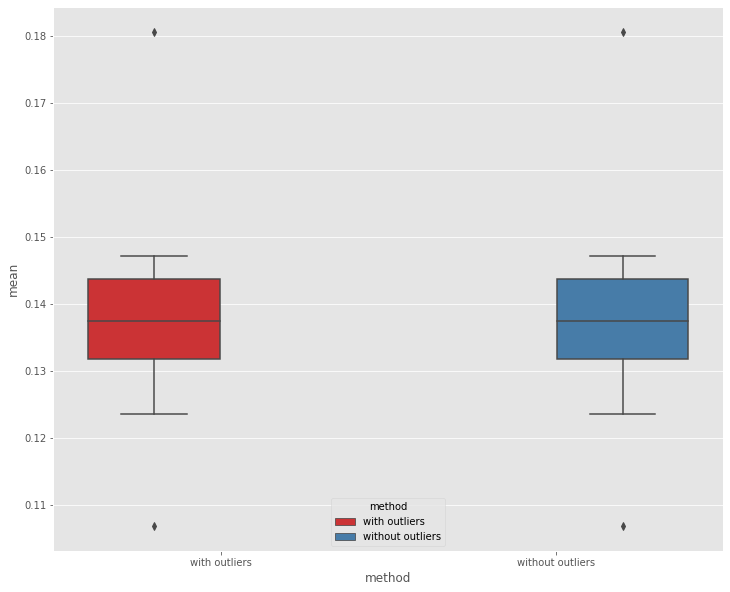

In [36]:
boxplot_results(normal_f1_list, outlier_f1_list)

A retirada dos outliers não aparenta tem impacto algum no desempenho do modelo.

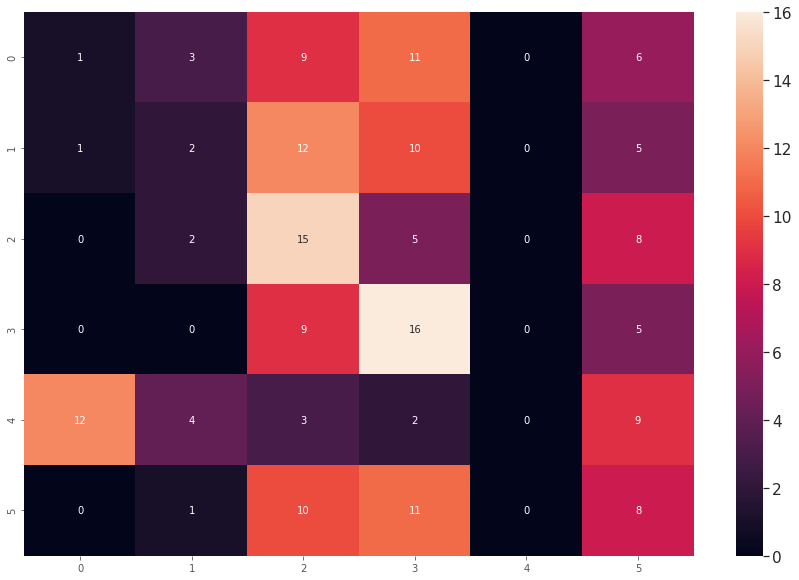

In [37]:
conf_matrix(normal_conf_matrix, normal_f1_list)

É possível observar que a matriz de confusão apresenta concentrações nas classes 2, 3 e 5, sendo a 3 a classe mais escolhida pelo modelo, ele parece tender muito para ela, não é um bom classificador. É interessante notar também que ele tende a classificar a classe 4 como 0, mas não classifica absoultamente ninguém para a 4.

In [38]:
index_best = normal_f1_list.index(max(normal_f1_list))
class_repo_list_best = normal_class_repo_list[index_best]

print(class_repo_list_best)

              precision    recall  f1-score   support

         cyl       0.07      0.03      0.05        30
        hook       0.17      0.07      0.10        30
         lat       0.20      0.27      0.23        30
        palm       0.29      0.53      0.38        30
       spher       0.00      0.00      0.00        30
         tip       0.26      0.50      0.34        30

    accuracy                           0.23       180
   macro avg       0.16      0.23      0.18       180
weighted avg       0.16      0.23      0.18       180



### Repeated K-fold 

Vamos utilizar o K-Fold repetido para ver o desempenho do modelo sem a realização do tratamento de dados.

>1 mean=0.0776 std=0.008
>2 mean=0.0811 std=0.014
>3 mean=0.0815 std=0.014
>4 mean=0.0817 std=0.014
>5 mean=0.0826 std=0.013


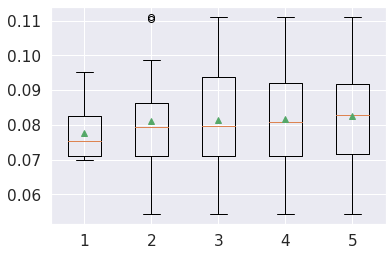

In [39]:
np.random.seed(11)

knn = KNeighborsClassifier(**knn_best)
best_score = repeated_KFold(knn, df_all)


Em geral temos um desempenho bastante insatisfatório, o que comprova que é necessaŕia a realização do PCA.

In [40]:
best_score

0.08258154149640318

In [41]:
dict_results['knn_kfold_repeated'] = best_score

## Decision Tree

As árvores de decisão (DTs) são um método de aprendizagem supervisionado não paramétrico utilizado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de uma variável alvo através do aprendizado de regras de decisão simples inferidas a partir das características dos dados. Uma árvore pode ser vista como uma aproximação constante por partes.

Algumas vantagens das árvores de decisão são:

- Simples de entender e de interpretar. As árvores podem ser visualizadas.

- Requer pouca preparação de dados. Outras técnicas muitas vezes requerem normalização dos dados, variáveis fictícias precisam ser criadas e valores em branco precisam ser removidos. Observe, entretanto, que este módulo não suporta valores ausentes.

- O custo de usar a árvore (isto é, prever dados) é logarítmico no número de pontos de dados usados para treinar a árvore.

- Utiliza um modelo de caixa branca. Se uma determinada situação é observável em um modelo, a explicação da condição é facilmente explicada pela lógica booleana. Em contraste, em um modelo de caixa preta (por exemplo, em uma rede neural artificial), os resultados podem ser mais difíceis de interpretar.

- É possível validar um modelo usando testes estatísticos. Isso torna possível contabilizar a confiabilidade do modelo.

- Funciona bem mesmo que suas suposições sejam de alguma forma violadas pelo modelo verdadeiro a partir do qual os dados foram gerados.

### Modelo baseline

In [42]:
np.random.seed(11)

X_train, X_test, y_train, y_test = create_X_y_df(df_all)

print("Modelo baseline")
base_model = DecisionTreeClassifier()
base_model.fit(X_train, y_train)
base, base_conf_matrix = evaluate(base_model, X_test, y_test)


Modelo baseline
Model Performance
Accuracy = 0.32323%.
F1 = 0.32838%.


### Baseline + PCA

In [43]:
np.random.seed(11)

pca = PCA(.50)

scaler = StandardScaler()


# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [44]:
np.random.seed(11)

print("Modelo baseline com PCA")
base_model = DecisionTreeClassifier()
base_model.fit(X_train, y_train)
base_f1, base_conf_matrix = evaluate(base_model, X_test, y_test)

dict_results['dtree_baseline'] = base_f1

print('Melhoria de {:0.5f}%.'.format( 100 * (base_f1 - base) / base))

Modelo baseline com PCA
Model Performance
Accuracy = 0.32660%.
F1 = 0.33647%.
Melhoria de 2.46492%.


Ainda não obtivemos um modelo satisfatório, no entanto o f1_score da árvore de decisão já é bem melhor do que o do knn. O PCA melhorou muito pouco os resultados, pode ser que ele não seja ideal ao se lidar com árvores de decisão, iremos constatar isso ao comparar a performance dos kfolds.

### Grid Search para achar parâmetros ótimos


In [45]:
np.random.seed(11)

data = df_all.copy()
data = data.values
X, y = data[:, :-1], data[:, -1]

pca = PCA(.50)

# Fit on training set only.
scaler.fit(X)
# Apply transform to both the training set and the test set.
X = scaler.transform(X)
pca.fit(X)
X = pca.transform(X)

max_depth = list(np.arange(3,15))
max_depth.append(None)

param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth}
dtree = DecisionTreeClassifier()
best_params, best_score = grid_search(dtree, param_grid, 10, X, y)

Fitting 10 folds for each of 26 candidates, totalling 260 fits
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.1s
[CV] END ........................criterion=gin

[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=14; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=14; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=14; total time=   0.2s
[CV] END ...................

[CV] END ....................criterion=entropy, max_depth=10; total time=   0.4s
[CV] END ....................criterion=entropy, max_depth=10; total time=   0.4s
[CV] END ....................criterion=entropy, max_depth=10; total time=   0.4s
[CV] END ....................criterion=entropy, max_depth=10; total time=   0.4s
[CV] END ....................criterion=entropy, max_depth=10; total time=   0.4s
[CV] END ....................criterion=entropy, max_depth=10; total time=   0.4s
[CV] END ....................criterion=entropy, max_depth=10; total time=   0.4s
[CV] END ....................criterion=entropy, max_depth=11; total time=   0.4s
[CV] END ....................criterion=entropy, max_depth=11; total time=   0.4s
[CV] END ....................criterion=entropy, max_depth=11; total time=   0.4s
[CV] END ....................criterion=entropy, max_depth=11; total time=   0.4s
[CV] END ....................criterion=entropy, max_depth=11; total time=   0.4s
[CV] END ...................

In [46]:
print(best_params)
dtree_best = best_params

{'criterion': 'gini', 'max_depth': None}


In [47]:
best_score

0.2984577885764418

### K-Fold com e sem a retirada de outliers


A seguir realizaremos uma validação cruzada com o k-fold para avaliar o desempenho do algoritmo, iremos fazer a validação com a base completa e com a base com a retirada de outliers para fins de comparação.

In [48]:
np.random.seed(11)

dtree = DecisionTreeClassifier(**dtree_best)  
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix, normal_f1_list, outlier_f1_list, normal_class_repo_list, outlier_class_repo_list = KFolds_outlier(df_all, dtree)

StratifiedKFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (1620, 104)
Acurácia antes retirada de outliers:  0.2722222222222222
F1-Score antes retirada de outliers:  0.27625067063329645
Tamanho do X_train após remover os outliers: (1539, 104)
Acurácia após retirada de outliers:  0.25
F1-Score após retirada de outliers:  0.26674601031579187
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (1620, 105)
Acurácia antes retirada de outliers:  0.2222222222222222
F1-Score antes retirada de outliers:  0.2338474424905
Tamanho do X_train após remover os outliers: (1539, 105)
Acurácia após retirada de outliers:  0.2833333333333333
F1-Score após retirada de outliers:  0.291525564030442
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de remover os outliers: 

In [49]:
print(np.amax(normal_f1_list))
print(np.amax(outlier_f1_list))

dict_results['dtree_kfold'] = np.mean(normal_f1_list)
dict_results['dtree_kfold_outlier'] = np.mean(outlier_f1_list)

0.33520948079776375
0.3234195815078168


Não há melhoria do modelo ao realizar o fine tuning dos parâmetros.

In [50]:
print("Sem retirada de outliers")
print("Desvio padrão:",np.std(normal_f1_list))
print("Média:", np.mean(normal_f1_list))
print("---------------------------------------")
print("Com retirada de outliers")
print("Desvio padrão:",np.std(outlier_f1_list))
print("Média:", np.mean(outlier_f1_list))

Sem retirada de outliers
Desvio padrão: 0.03769958569791497
Média: 0.287373528002665
---------------------------------------
Com retirada de outliers
Desvio padrão: 0.017823922653975668
Média: 0.2913808935865171


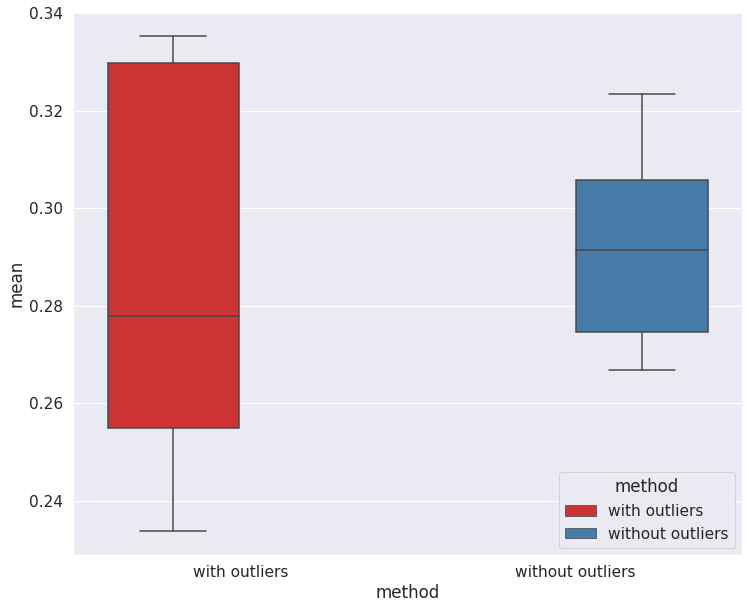

In [51]:
boxplot_results(normal_f1_list, outlier_f1_list)

No caso da árvore de decisão podemos observar que a retirada de outliers não tem o melhor score, mas possui a melhor média e diminui o desvio padrão dos scores, assim sendo preferível à não retirada dos mesmos.

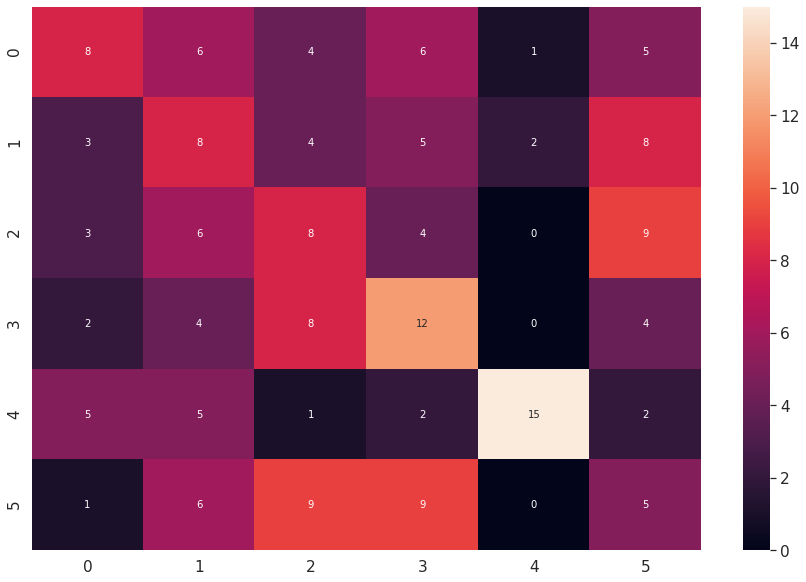

In [52]:
conf_matrix(outlier_conf_matrix, outlier_f1_list)

A árvore de decisão é definitivamente melhor do que o modelo knn para esse conjunto de dados, no entanto o modelo continua apostando muito na classe 3 e errando com frequencia nas outras, é interessante notar que a 4 (spher) agora está sendo classificada corretamente e com uma precisão satisfatória.

In [53]:
index_best = outlier_f1_list.index(max(outlier_f1_list))
class_repo_list_best = outlier_class_repo_list[index_best]

print(class_repo_list_best)

              precision    recall  f1-score   support

         cyl       0.36      0.27      0.31        30
        hook       0.23      0.27      0.25        30
         lat       0.15      0.17      0.16        30
        palm       0.32      0.40      0.35        30
       spher       0.83      0.50      0.62        30
         tip       0.24      0.27      0.25        30

    accuracy                           0.31       180
   macro avg       0.35      0.31      0.32       180
weighted avg       0.35      0.31      0.32       180



### Repeated K-Fold

Vamos utilizar o K-Fold repetido para ver o desempenho do modelo sem a realização do tratamento de dados.

>1 mean=0.3098 std=0.035
>2 mean=0.3279 std=0.037
>3 mean=0.3161 std=0.038
>4 mean=0.3183 std=0.033
>5 mean=0.3222 std=0.036


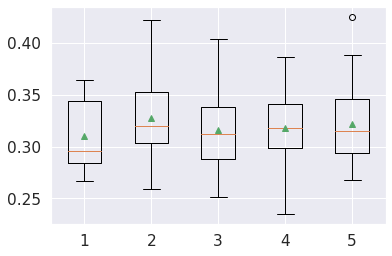

In [54]:
np.random.seed(11)

dtree = DecisionTreeClassifier(**dtree_best)
best_score = repeated_KFold(dtree, df_all)

In [55]:
best_score

0.3278877767327383

No caso da árvore de decisão não houve uma diferença muito brusca entre os desempenhos sem e com o tratamento de dados, mas o sem tratamento de dados tende a ter um f1_score melhor em média.

In [56]:

dict_results['dtree_kfold_repeated'] = best_score

## Random Forest

Florestas aleatórias ou florestas de decisão aleatória são um método de aprendizagem em conjunto para classificação, regressão e outras tarefas que operam através da construção de uma multiplicidade de árvores de decisão em tempo de treinamento e produzindo a classe que é o modo das classes (classificação) ou previsão de média/ média (regressão) das árvores individuais. Florestas de decisão aleatória corrigem o hábito das árvores de decisão de se ajustarem em excesso ao seu conjunto de treinamento. Florestas aleatórias geralmente superam as árvores de decisão, mas sua precisão é menor do que as árvores de decisão de gradiente. Entretanto, as características dos dados podem afetar seu desempenho.

### Modelo baseline

In [57]:
np.random.seed(11)

X_train, X_test, y_train, y_test = create_X_y_df(df_all)


base_model = RandomForestClassifier(n_estimators = 10, random_state = 11)
base_model.fit(X_train, y_train)
base, base_conf_matrix = evaluate(base_model, X_test, y_test)


Model Performance
Accuracy = 0.39731%.
F1 = 0.38974%.


In [58]:
dict_results['forest_baseline'] = base

In [59]:
np.random.seed(11)

pca = PCA(.50)

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


In [60]:

base_model = RandomForestClassifier(n_estimators = 10, random_state = 11)
base_model.fit(X_train, y_train)
base_f1, base_conf_matrix = evaluate(base_model, X_test, y_test)

Model Performance
Accuracy = 0.31818%.
F1 = 0.32930%.


No caso da random forest o modelo baseline com PCA possui score significativamente menor do que o sem PCA. 

### Grid Search para melhorar parâmetros

Iremos realizar o grid search duas vezes, para verificar se ele escolhe parâmetros diferentes com a base sem tratamento (já que ela deu melhores resultados inicialmente).

In [61]:
np.random.seed(11)

print("Grid com X_train e X_test com PCA")
n_estimators = [10, 25]
# Number of features to consider at every split
crit = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = list(np.arange(3, 15))
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': crit,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth, 'n_estimators': n_estimators}

# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model

scorer = make_scorer(f1_score, average = 'weighted')

grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2, scoring=scorer)

Grid com X_train e X_test com PCA


In [62]:
np.random.seed(11)

grid.fit(X_train, y_train)

print(grid.best_params_)
best_grid = grid.best_estimator_
grid_f1, conf_matrix_grid = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.5f}%.'.format( 100 * (grid_f1 - base) / base))

Fitting 10 folds for each of 52 candidates, totalling 520 fits
{'criterion': 'gini', 'max_depth': 13, 'n_estimators': 25}
Model Performance
Accuracy = 0.37205%.
F1 = 0.35714%.
Improvement of -8.36325%.


In [63]:
forest_pca_best = grid.best_params_

In [64]:
np.random.seed(11)
X_train, X_test, y_train, y_test = create_X_y_df(df_all)

print("Grid com X_train e X_test sem PCA")
# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model

scorer = make_scorer(f1_score, average = 'weighted')

grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2, scoring=scorer)

Grid com X_train e X_test sem PCA


In [65]:
np.random.seed(11)

grid.fit(X_train, y_train)

print(grid.best_params_)
best_grid = grid.best_estimator_
grid_f1, conf_matrix_grid = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.5f}%.'.format( 100 * (grid_f1 - base) / base))

Fitting 10 folds for each of 52 candidates, totalling 520 fits
{'criterion': 'gini', 'max_depth': 14, 'n_estimators': 25}
Model Performance
Accuracy = 0.44949%.
F1 = 0.43559%.
Improvement of 11.76623%.


In [66]:
forest_best = grid.best_params_

Sem o PCA o grid search conseguiu melhorar o modelo até termos quase 50% em f1_score, a única diferença no entanto entre as grids foi na profundidade máxima.

### K-Fold com e sem a retirada de outliers

A seguir realizaremos uma validação cruzada com o k-fold para avaliar o desempenho do algoritmo, iremos fazer a validação com a base completa e com a base com a retirada de outliers para fins de comparação.

In [67]:
np.random.seed(11)

forest = RandomForestClassifier(**forest_best)
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix, normal_f1_list, outlier_f1_list, normal_class_repo_list, outlier_class_repo_list = KFolds_outlier(df_all, forest)

StratifiedKFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (1620, 104)
Acurácia antes retirada de outliers:  0.3611111111111111
F1-Score antes retirada de outliers:  0.34647673851178656
Tamanho do X_train após remover os outliers: (1539, 104)
Acurácia após retirada de outliers:  0.3333333333333333
F1-Score após retirada de outliers:  0.3287625625166195
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (1620, 105)
Acurácia antes retirada de outliers:  0.4111111111111111
F1-Score antes retirada de outliers:  0.4049761681943189
Tamanho do X_train após remover os outliers: (1539, 105)
Acurácia após retirada de outliers:  0.3055555555555556
F1-Score após retirada de outliers:  0.30181555998170456
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de rem

In [68]:
print(np.amax(normal_f1_list))
print(np.amax(outlier_f1_list))

dict_results['forest_kfold'] = np.mean(normal_f1_list)
dict_results['forest_kfold_outlier'] = np.mean(outlier_f1_list)

0.4637842903453966
0.4297242511948879


In [69]:
print("Sem retirada de outliers")
print("Desvio padrão:",np.std(normal_f1_list))
print("Média:", np.mean(normal_f1_list))
print("---------------------------------------")
print("Com retirada de outliers")
print("Desvio padrão:",np.std(outlier_f1_list))
print("Média:", np.mean(outlier_f1_list))

Sem retirada de outliers
Desvio padrão: 0.03915623002957847
Média: 0.3837727344581737
---------------------------------------
Com retirada de outliers
Desvio padrão: 0.039692204505575555
Média: 0.3733986220451075


O kfold com PCA mostra que realmente para a árvore de decisão é melhor seguir sem realizar a redução de dimensionalidade, também podemos observar que nesse caso a retirada de outliers é benéfica para a média de scores, sendo assim preferivel.

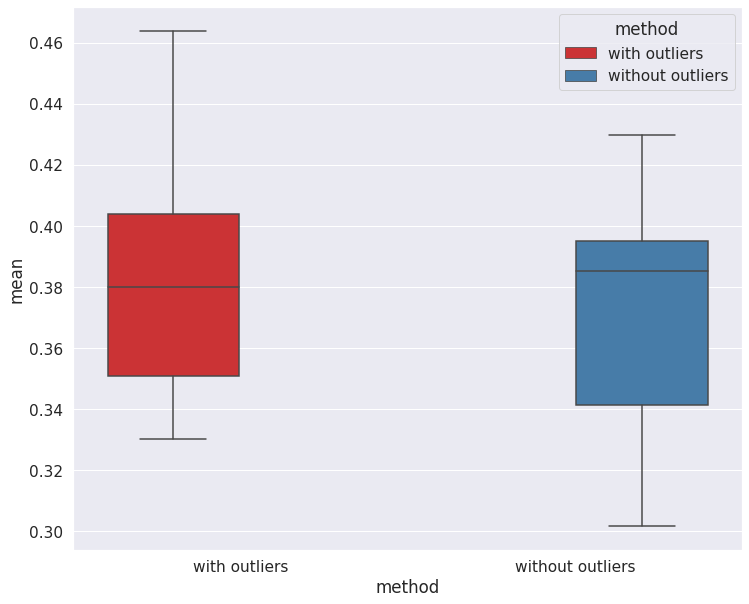

In [70]:
boxplot_results(normal_f1_list, outlier_f1_list)

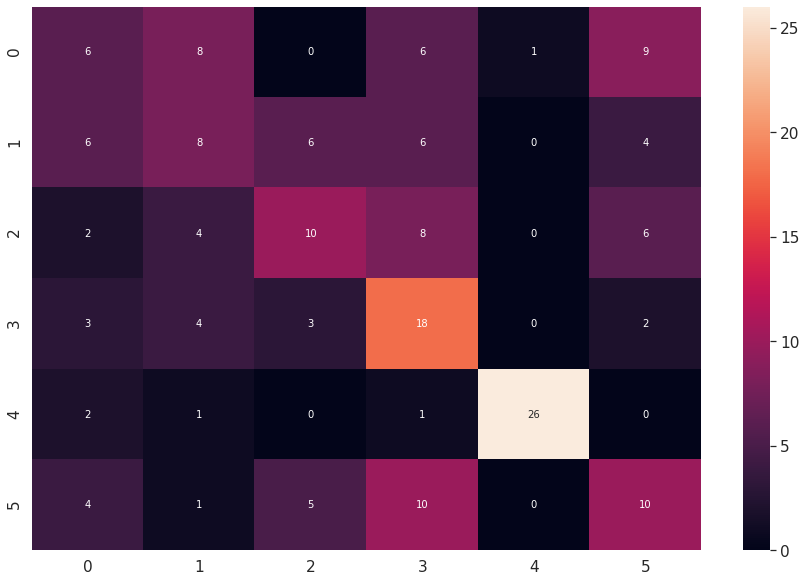

In [71]:
conf_matrix(outlier_conf_matrix, outlier_f1_list)

Na random forest podemos ver que a classe 4 (spher) está quase 100% classificada corretamente, houve também uma melhora significativa nas classificações das classes 5, 3 e 2, no entanto ainda não temos um bom preditor. É interessante notar que ele ainda classifica a maioria dos casos como pertencentes a classe 3.

In [72]:
index_best = outlier_f1_list.index(max(outlier_f1_list))
class_repo_list_best = outlier_class_repo_list[index_best]

print(class_repo_list_best)

              precision    recall  f1-score   support

         cyl       0.26      0.20      0.23        30
        hook       0.31      0.27      0.29        30
         lat       0.32      0.33      0.33        30
        palm       0.37      0.60      0.46        30
       spher       0.96      0.87      0.91        30
         tip       0.42      0.33      0.37        30

    accuracy                           0.43       180
   macro avg       0.44      0.43      0.43       180
weighted avg       0.44      0.43      0.43       180



### Repeated K-Fold

In [73]:
np.random.seed(11)

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats, model):
    # prepare the cross-validation procedure
    scores = []
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=11)
    # create model
    model = model
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        class_repo = classification_report(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred, labels=["cyl", "hook", "tip", "palm", "spher", "lat"])
        f1 = f1_score(y_test, y_pred,labels=["cyl", "hook", "tip", "palm", "spher", "lat"], average='weighted')
        ds = {"f1": f1, "acc": acc, "classification_report": class_repo, "conf_matrix": conf_matrix}
        scores.append(ds)
        
    return scores

def repeated_KFold(model, df_all):
  # create datasetdata = df_all.values
  data = df_all.values
  X, y = data[:, :-1], data[:, -1]
  # configurations to test
  repeats = range(1,6)
  results = list()
  modelo = model

  all_scores = []
  for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, y, r, modelo)
    f1_list = []
    
    for i in scores:
        f1_list.append(i["f1"])
        
    # summarize
    print('>%d mean=%.4f std=%.3f' % (r, mean(f1_list), std(f1_list)))
    # store
    results.append(f1_list)
    all_scores.append(scores)
  # plot the results
  pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
  pyplot.show()


  mean_scores = []
  for i in results:
    mean_scores.append(mean(i))
  best_score = np.amax(mean_scores)

  return best_score, all_scores

>1 mean=0.4643 std=0.042
>2 mean=0.4597 std=0.033
>3 mean=0.4544 std=0.035
>4 mean=0.4560 std=0.038
>5 mean=0.4508 std=0.036


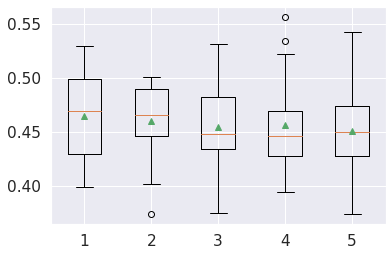

In [74]:
np.random.seed(11)

forest = RandomForestClassifier(**forest_best)
best_score, scores = repeated_KFold(forest, df_all)

In [75]:
best_score

0.4642869684496689

Classification report e matriz de confusão da melhor iteração do repeated kfold

In [76]:
print(scores[0][8]["classification_report"])

              precision    recall  f1-score   support

         cyl       0.48      0.43      0.46        30
        hook       0.61      0.63      0.62        30
         lat       0.26      0.20      0.23        30
        palm       0.35      0.27      0.30        30
       spher       0.83      1.00      0.91        30
         tip       0.47      0.63      0.54        30

    accuracy                           0.53       180
   macro avg       0.50      0.53      0.51       180
weighted avg       0.50      0.53      0.51       180



<AxesSubplot:>

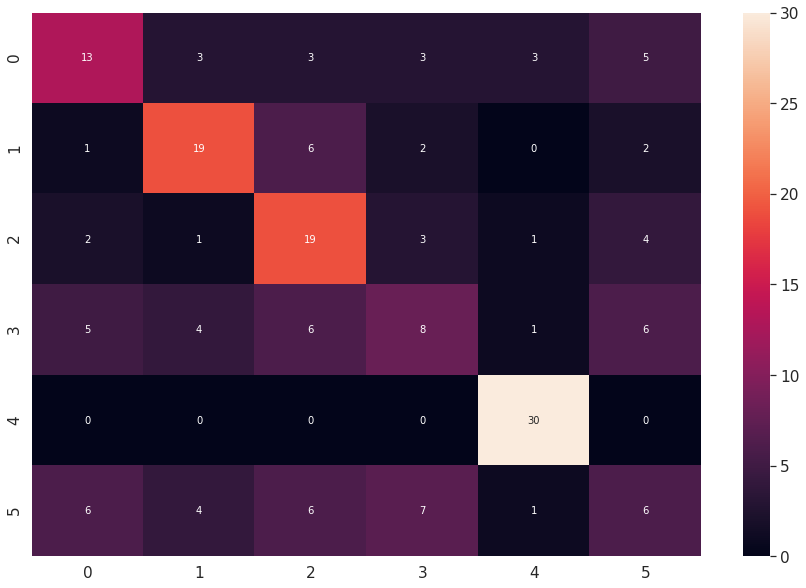

In [77]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.set(font_scale=1.4) # for label size
sns.heatmap(scores[0][8]["conf_matrix"], annot=True, annot_kws={"size": 10}) # font size

In [78]:
dict_results['forest_kfold_repeated'] = best_score


Quando não realizamos o PCA temos uma redução de performance na classificação das classes 5 e 3, no entanto há uma melhora significativa na acurácia de todas as outras classes, sendo este nosso melhor preditor até agora. Para a spher temos que ele identifica corretamente todos os membros da classe, no entanto ainda classifica incorretamente alguns pontos que pertencem a outros rótulos. Apesar de ser nosso melhor preditor, ele ainda não é um preditor bom, ou sequer mediano para o problema, pois não acerta pelo menos mais da metade das previsões de cada classe. A classe 5 (lat) é a mais confusa para o modelo.

## MLP

Um perceptron multicamadas (MLP) é uma classe de rede neural artificial feedforward (ANN). Ele consiste de pelo menos três camadas de nós: uma camada de entrada, uma camada oculta e uma camada de saída, exceto pelos nós de entrada, cada nó é um neurônio que usa uma função de ativação não linear. O MLP utiliza uma técnica de aprendizagem supervisionada chamada backpropagation para treinamento, suas múltiplas camadas e ativação não linear distinguem o MLP de um perceptron linear. Ele pode distinguir dados que não são separáveis linearmente.

### Modelo baseline

In [79]:
np.random.seed(11)


X_train, X_test, y_train, y_test = create_X_y_df(df_all)

print("Modelo baseline")
base_model = MLPClassifier()
base_model.fit(X_train, y_train)
base, base_conf_matrix = evaluate(base_model, X_test, y_test)


Modelo baseline
Model Performance
Accuracy = 0.22559%.
F1 = 0.22548%.


O modelo baseline do MLP não chega a ser melhor do que o da random forest.

### Baseline + PCA

In [80]:
np.random.seed(11)

pca = PCA(.50)

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


In [81]:
np.random.seed(11)

print("Modelo baseline + PCA")
base_model = MLPClassifier()
base_model.fit(X_train, y_train)
base_f1, base_conf_matrix = evaluate(base_model, X_test, y_test)

dict_results['mlp_baseline'] = base_f1

Modelo baseline + PCA
Model Performance
Accuracy = 0.26431%.
F1 = 0.27422%.


A MLP aparentemente tem uma performance melhor quando é realizado o PCA

### GridSearch para melhorar parâmetros

In [82]:
np.random.seed(11)

data = df_all.copy()
data = data.values
X, y = data[:, :-1], data[:, -1]

pca = PCA(.50)

# Fit on training set only.
scaler.fit(X)
# Apply transform to both the training set and the test set.
X = scaler.transform(X)
pca.fit(X)
X = pca.transform(X)


In [83]:
np.random.seed(11)

#hidden_layer_sizes=100, activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

hidden_layer_sizes = [100, 120, 150, 200]
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']
#max_iter = [400]

param_grid = {'hidden_layer_sizes': hidden_layer_sizes, 'activation': activation, 'solver': solver}
mlp = MLPClassifier()

best_params, best_score = grid_search(mlp, param_grid,10, X,y)


Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.7s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.7s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.8s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=100, solver=sgd; t

[CV] END activation=identity, hidden_layer_sizes=200, solver=lbfgs; total time=   1.3s
[CV] END activation=identity, hidden_layer_sizes=200, solver=lbfgs; total time=   1.4s
[CV] END activation=identity, hidden_layer_sizes=200, solver=lbfgs; total time=   1.3s
[CV] END activation=identity, hidden_layer_sizes=200, solver=lbfgs; total time=   1.3s
[CV] END activation=identity, hidden_layer_sizes=200, solver=lbfgs; total time=   1.5s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   2.1s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   1.7s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   2.1s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   2.2s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   1.5s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   2.2s
[CV] END activation=identity, hidden_layer_sizes=200, s

[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   5.3s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   5.3s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   5.3s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   5.3s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   5.5s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   5.9s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   5.4s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   6.1s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   5.8s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=adam; total time=   6.7s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=adam; total time=   6.2s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=ad

[CV] END activation=tanh, hidden_layer_sizes=120, solver=sgd; total time=   6.0s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   7.0s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   6.9s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   6.7s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   6.8s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   6.7s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   6.7s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   6.7s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   7.0s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   6.6s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   6.8s
[CV] END activation=tanh, hidden_layer_sizes=150, solver=lbfgs; total time=   2.5s
[CV] END activat

[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=   4.3s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   1.6s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   2.0s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   1.5s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   1.7s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   2.4s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   1.5s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=120, solver=sgd; total time=   4.3s
[CV] EN

In [84]:
best_score

0.3350402069255698

In [85]:
mlp_best = best_params
best_params

{'activation': 'relu', 'hidden_layer_sizes': 120, 'solver': 'lbfgs'}

### K-Fold com e sem a retirada de outliers

A seguir realizaremos uma validação cruzada com o k-fold para avaliar o desempenho do algoritmo, iremos fazer a validação com a base completa e com a base com a retirada de outliers para fins de comparação. Usaremos os parâmetros ótimos encontrados pelo gridSearch.

In [86]:
np.random.seed(11)

mlp = MLPClassifier(**mlp_best)
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix, normal_f1_list, outlier_f1_list, normal_class_repo_list, outlier_class_repo_list = KFolds_outlier(df_all, mlp)

StratifiedKFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (1620, 104)
Acurácia antes retirada de outliers:  0.3
F1-Score antes retirada de outliers:  0.3085956908987483
Tamanho do X_train após remover os outliers: (1539, 104)
Acurácia após retirada de outliers:  0.3055555555555556
F1-Score após retirada de outliers:  0.31664373186550604
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (1620, 105)
Acurácia antes retirada de outliers:  0.29444444444444445
F1-Score antes retirada de outliers:  0.3049448048123096
Tamanho do X_train após remover os outliers: (1539, 105)
Acurácia após retirada de outliers:  0.3055555555555556
F1-Score após retirada de outliers:  0.314683251366338
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de remover os outliers

In [87]:
print(np.amax(normal_f1_list))
print(np.amax(outlier_f1_list))

dict_results['mlp_kfold'] = np.mean(normal_f1_list)
dict_results['mlp_kfold_outlier'] = np.mean(outlier_f1_list)

0.4071517285204181
0.3561442006269593


In [88]:
print("Sem retirada de outliers")
print("Desvio padrão:",np.std(normal_f1_list))
print("Média:", np.mean(normal_f1_list))
print("---------------------------------------")
print("Com retirada de outliers")
print("Desvio padrão:",np.std(outlier_f1_list))
print("Média:", np.mean(outlier_f1_list))

Sem retirada de outliers
Desvio padrão: 0.035863649427562636
Média: 0.3238840662151783
---------------------------------------
Com retirada de outliers
Desvio padrão: 0.02883770246465578
Média: 0.31504536102856895


A retirada de outliers aparenta prejudicar a média do modelo no caso do mlp, no entanto como esperado ela diminui o seu desvio padrão.

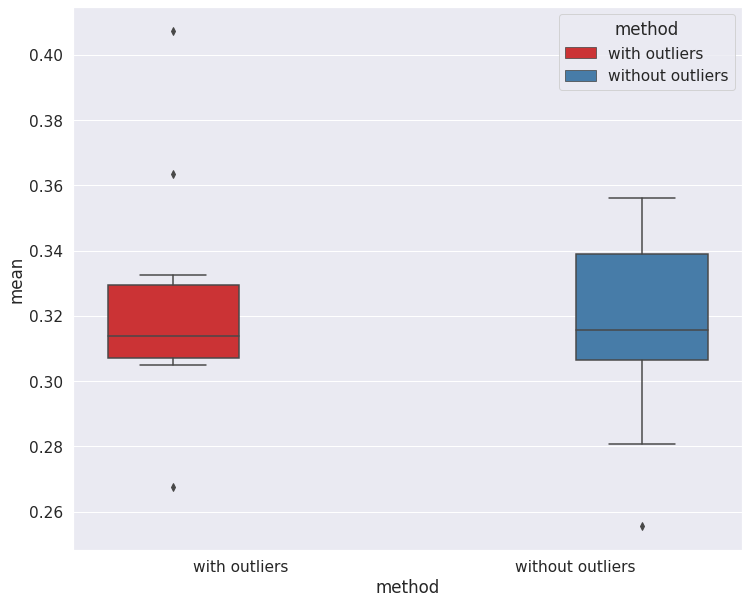

In [89]:
boxplot_results(normal_f1_list, outlier_f1_list)

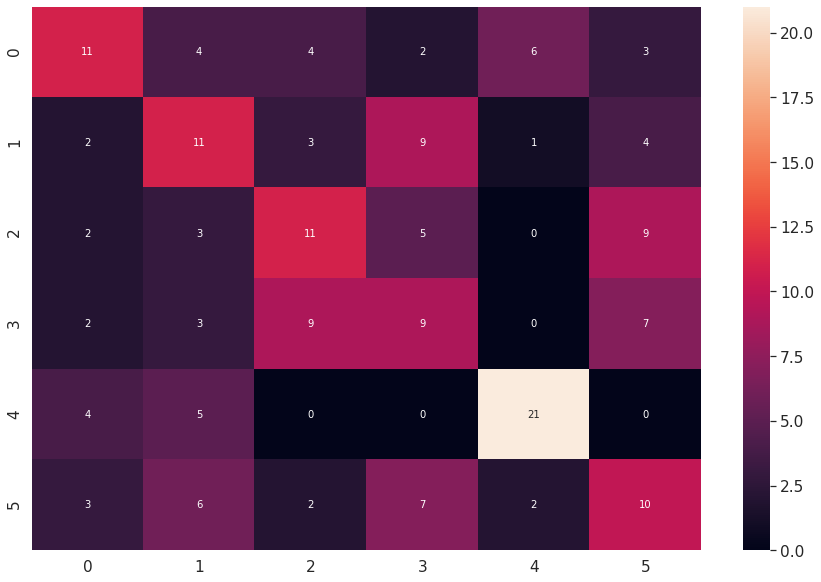

In [90]:
conf_matrix(normal_conf_matrix, normal_f1_list)

A matriz de confusão do mlp mostra que ele não consegue distinguir bem as classes (exceto a spher), sua performance é bastante parecida com a da árvore de decisão em questão de score, em relação a matriz, a árvore de decisão consegue distinguir melhor a classe 3 (palm) do que o mlp. A random forest segue sendo o melhor modelo até então, mas a mlp consegue ter uma performance um pouco superior no que se diz a respeito das classes 3 e 5.

In [91]:
index_best = normal_f1_list.index(max(normal_f1_list))
class_repo_list_best = normal_class_repo_list[index_best]

print(class_repo_list_best)

              precision    recall  f1-score   support

         cyl       0.46      0.37      0.41        30
        hook       0.34      0.37      0.35        30
         lat       0.30      0.33      0.32        30
        palm       0.28      0.30      0.29        30
       spher       0.70      0.70      0.70        30
         tip       0.38      0.37      0.37        30

    accuracy                           0.41       180
   macro avg       0.41      0.41      0.41       180
weighted avg       0.41      0.41      0.41       180



### Repeated K-Fold

>1 mean=0.3041 std=0.032
>2 mean=0.3004 std=0.023
>3 mean=0.2988 std=0.033
>4 mean=0.2958 std=0.033
>5 mean=0.2991 std=0.033


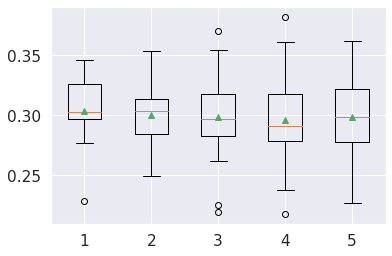

In [92]:
np.random.seed(11)

mlp = MLPClassifier(**mlp_best)
best_score, scores = repeated_KFold(mlp, df_all)

In [93]:
best_score

0.3040614367437886

O kfold repetido apenas confirma o que foi observado anteriormente: para o mlp é necessário realizar o tratamento dos dados com redução de dimensionalidade.

In [94]:
dict_results['mlp_kfold_repeated'] = best_score

## Ensemble: Neural Networks


### Stacking

Stacked Generalization ou simplesmente stacking é um algoritmo de aprendizagem de máquinas de ensemble.

Ele envolve a combinação das previsões de vários modelos de aprendizagem de máquina no mesmo conjunto de dados, assim como boosting e bagging.

O stacking aborda o questionamento a seguir:


>Dados os múltiplos modelos de aprendizagem de máquinas que são hábeis num problema, mas de formas diferentes, como se escolhe qual o modelo a utilizar?


A abordagem utilizada é usar outro modelo de aprendizagem de máquina que aprende quando utilizar ou confiar em cada modelo do conjunto.


A arquitetura de um modelo de empilhamento envolve dois ou mais modelos de base, frequentemente referidos como modelos de nível 0, e um meta-modelo que combina as previsões dos modelos de base, referidos como modelos de nível 1.

> 1. Modelos de nível-0 (Modelos de Base): Modelos treinados com os dados de treino e cujas previsões são compiladas.
> 2. Modelo de nível-1 (Meta-Modelo): Modelo que aprende a melhor forma de combinar as previsões dos modelos de base.

Iremos realizar um stacking com 3 redes neurais mlp diferentes para observar se o comitê apresenta alguma melhoria em relação a rede mlp original.

(1800, 2501)
>mlp-nn 0.305 (0.030)
>mlp-nn1 0.335 (0.035)
>mlp-nn2 0.239 (0.030)
>stacking 0.340 (0.026)


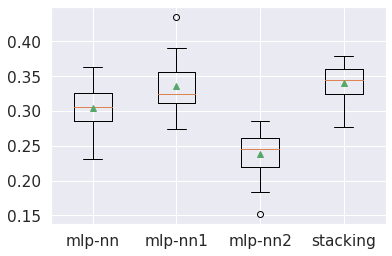

In [95]:
np.random.seed(11)
SEED = 11
seed = 11

data = df_all
print(data.shape) 
data = data.values
X, y = data[:, :-1], data[:, -1]


def get_stacking():
  nn = MLPClassifier(**mlp_best, early_stopping=False, random_state=seed)
  nn1 = MLPClassifier(hidden_layer_sizes = 150, solver = 'sgd', early_stopping=False, random_state=SEED)
  nn2 = MLPClassifier(hidden_layer_sizes = 100, solver= 'adam', early_stopping=False, random_state=SEED)

  # Definindo os modelos base do stacking
  level0 = list()
  level0.append(('nn', nn))
  level0.append(('nn1', nn1))
  level0.append(('nn2', nn2))
	# definindo o modelo meta learner 
  level1 = LogisticRegression()
  # definindo o ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
  return model
 

# função retorna os modelos a serem avaliados
def get_models():
  nn1 = MLPClassifier(hidden_layer_sizes = 150, solver = 'sgd', early_stopping=False, random_state=SEED)
  nn2 = MLPClassifier(hidden_layer_sizes = 100, solver= 'adam', early_stopping=False, random_state=SEED)
  nn = MLPClassifier(**mlp_best, early_stopping=False, random_state=seed)

  models = dict()
  models['mlp-nn'] = nn
  models['mlp-nn1'] = nn1
  models['mlp-nn2'] = nn2
  models['stacking'] = get_stacking()
  return models
 
def evaluate_model(model, X, y):
    scorer = make_scorer(f1_score, average = 'weighted')
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
    scores = cross_val_score(model, X, y, scoring=scorer, cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Em relação a todos os modelos sem redução de dimensionalidade (exceto o da random forest) o modelo de stacking de mlps possui uma performance melhor.

## Ensemble: modelos criados anteriormente


O mesmo método de stacking será utilizado para combinar todos os modelos criados anteriormente (com seus melhores parâmetros) e visualizar se há alguma melhoria em relação ao desempenho. 

(1800, 2501)
>mlp-nn 0.305 (0.030)
>knn 0.081 (0.014)
>dtree 0.316 (0.033)
>forest 0.448 (0.030)
>stacking 0.467 (0.036)


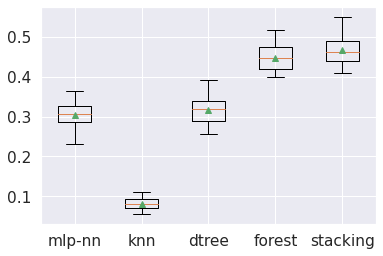

In [96]:
np.random.seed(11)
seed = 11

data = df_all 
print(data.shape) 
data = data.values
X, y = data[:, :-1], data[:, -1]

def get_stacking():
  mlp = MLPClassifier(**mlp_best, early_stopping=False, random_state=seed)
  forest = RandomForestClassifier(**forest_best)
  dtree = DecisionTreeClassifier(**dtree_best)
  knn = KNeighborsClassifier(**knn_best)

  # Definindo os modelos base do stacking
  level0 = list()
  level0.append(('mlp-nn', mlp))
  level0.append(('knn', knn))
  level0.append(('dtree', dtree))
  level0.append(('forest', forest))
  
	# definindo o modelo meta learner 
  level1 = LogisticRegression()
  # definindo o ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
  return model
 

# função retorna os modelos a serem avaliados
def get_models():
  mlp = MLPClassifier(**mlp_best, early_stopping=False, random_state=seed)
  forest = RandomForestClassifier(**forest_best)
  dtree = DecisionTreeClassifier(**dtree_best)
  knn = KNeighborsClassifier(**knn_best)

  models = dict()
  models['mlp-nn'] = mlp
  models['knn'] = knn
  models['dtree'] = dtree
  models['forest'] = forest
  models['stacking'] = get_stacking()
  return models
 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
    scorer = make_scorer(f1_score, average = 'weighted')
    scores = cross_val_score(model, X, y, scoring=scorer, cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

O ensemble com stacking possui uma performance semelhante ao da random forest e melhor do que todos os modelos anteriores. 

## Ensemble com Boosting

Os métodos de boosting funcionam na seguinte forma: construímos uma família de modelos que são agregados para obter um *learner* forte que tenha um melhor desempenho. 

No entanto, ao contrário do bagging que visa principalmente reduzir a variância, o boosting é uma técnica que consiste em encaixar sequencialmente vários *learners* fracos de uma forma muito adaptativa: cada modelo na sequência é encaixado dando mais importância às observações no conjunto de dados que foram mal tratadas pelos modelos anteriores na sequência. 

Intuitivamente, cada novo modelo concentra os seus esforços nas observações mais difíceis de encaixar até agora, de modo a obter, no final do processo, um *learner* forte com menor bias (mesmo que se note que o boosting também pode ter o efeito de reduzir a variância). O boosting, tal como o bagging, pode ser utilizado para a regressão, bem como para problemas de classificação.

>mlp-nn 0.305 (0.030)
>knn 0.081 (0.014)
>dtree 0.313 (0.033)
>forest 0.448 (0.030)
>10 0.471 (0.029)
>15 0.474 (0.032)
>25 0.467 (0.037)
>50 0.439 (0.044)
>100 0.447 (0.035)
>500 0.455 (0.036)
>1000 0.440 (0.041)


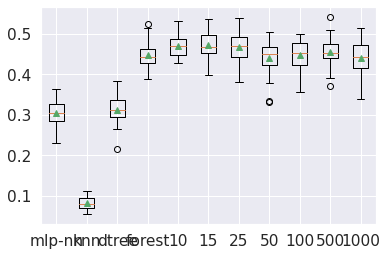

In [97]:
from sklearn.ensemble import AdaBoostClassifier

seed = 11
np.random.seed(seed)

def get_models():
  mlp = MLPClassifier(**mlp_best, early_stopping=False, random_state=seed)
  forest = RandomForestClassifier(**forest_best)
  dtree = DecisionTreeClassifier(**dtree_best)
  knn = KNeighborsClassifier(**knn_best)
  n_trees = [10, 15, 25, 50, 100, 500, 1000]

  models = dict()
  models['mlp-nn'] = mlp
  models['knn'] = knn
  models['dtree'] = dtree
  models['forest'] = forest

  #param_base = {'criterion': 'gini', 'max_depth': None}
  forest_base = RandomForestClassifier(**forest_best)

  # Variando os modelos
  base_estimators = [forest_base] # não é possível realizar a variação dos modelos pois é necessário 
  # suporte para sample weighting, bem como atributos classes_ e n_classes_ adequados. 
  for n in n_trees:
    for b in base_estimators:
      models[str(n)] = AdaBoostClassifier(n_estimators=n, base_estimator = b)
  return models
 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
    scorer = make_scorer(f1_score, average = 'weighted')
    scores = cross_val_score(model, X, y, scoring=scorer, cv=cv, n_jobs=-1)
    return scores
 

models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
 

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

O ensemble com boosting possui uma performance semelhante ao da random forest quando utilizamos 100 e 500 árvores, no entanto o de stacking é preferível por possuir a mesma variância e um score um pouco melhor.

## XGBoost

Outra modalidade de boosting que iremos utilizar é o XGBoost, que é basicamente um Gradient Boosting de árvores de decisão, como a random forest (conjunto de árvores de decisão aleatorizadas) foi nosso melhor modelo solo é esperado que o XGBoost performe pelo menos melhor do que apenas a árvore de decisão sozinha.

### Baseline

In [98]:
np.random.seed(11)

import xgboost as XGB

X_train, X_test, y_train, y_test = create_X_y_df(df_all)

xgb = XGB.XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=["cyl", "hook", "tip", "palm", "spher", "lat"])
base = f1_score(y_test, y_pred,labels=["cyl", "hook", "tip", "palm", "spher", "lat"], average='weighted')
class_repo = classification_report(y_test, y_pred)


[17:32:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [99]:
base

0.49034274679715967

O baseline do XGBoost já performa melhor que nosso melhor conjunto de stacking, portanto iremos aplicar PCA e variar os parâmetros para verificar se podemos melhorar ainda mais essa performance.

In [100]:
dict_results["xgb_baseline"] = base

### Baseline + PCA

In [101]:
np.random.seed(11)

pca = PCA(.50)

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=["cyl", "hook", "tip", "palm", "spher", "lat"])
base_pca = f1_score(y_test, y_pred,labels=["cyl", "hook", "tip", "palm", "spher", "lat"], average='weighted')
class_repo = classification_report(y_test, y_pred)

[17:33:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [102]:
base_pca

0.3645772717440284

Como esperado (por usar árvores de decisão) o XGBoost não tem uma melhora de performance com o PCA.

### GridSearch para refinamento de parâmetros

In [103]:
np.random.seed(11)


X_train, X_test, y_train, y_test = create_X_y_df(df_all)

clf = XGB.XGBClassifier()

parameters = {
     "eta"    : [0.05, 0.10, 0.15 ] ,
     "max_depth"        : [ 3,  6, 10, 15, None],
     "min_child_weight" : [ 1, 3 ],
     "gamma"            : [ 0.0, 0.1, 0.2 ],
     "colsample_bytree" : [ 0.3, 0.5 ]
     }


scorer = make_scorer(f1_score, average = 'weighted')
grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring=scorer,
                    cv=3, verbose=2)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
[05:00:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [104]:
np.random.seed(11)

print(grid.best_params_)
best_grid = grid.best_estimator_
grid_f1, conf_matrix_grid = evaluate(best_grid, X_test, y_test)

xgb_best = grid.best_params_
print('Improvement of {:0.5f}%.'.format( 100 * (grid_f1 - base) / base))

{'colsample_bytree': 0.3, 'eta': 0.05, 'gamma': 0.1, 'max_depth': 15, 'min_child_weight': 3}
Model Performance
Accuracy = 0.52694%.
F1 = 0.51665%.
Improvement of 5.36520%.


Com o GridSearch obtivemos uma melhora no modelo de XGBoost.

### Treinando um modelo XGBoost com os parâmetros refinados

In [122]:
np.random.seed(11)



X_train, X_test, y_train, y_test = create_X_y_df(df_all)
xgb = XGB.XGBClassifier(**xgb_best)
xgb.fit(X_train, y_train)

[08:09:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.05, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.0500000007, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [123]:
y_pred = xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=["cyl", "hook", "tip", "palm", "spher", "lat"])
f1 = f1_score(y_test, y_pred,labels=["cyl", "hook", "tip", "palm", "spher", "lat"], average='weighted')
class_repo = classification_report(y_test, y_pred)


In [124]:
f1

0.5166505960203125

In [125]:
dict_results["xgb_grid"] = f1

<AxesSubplot:>

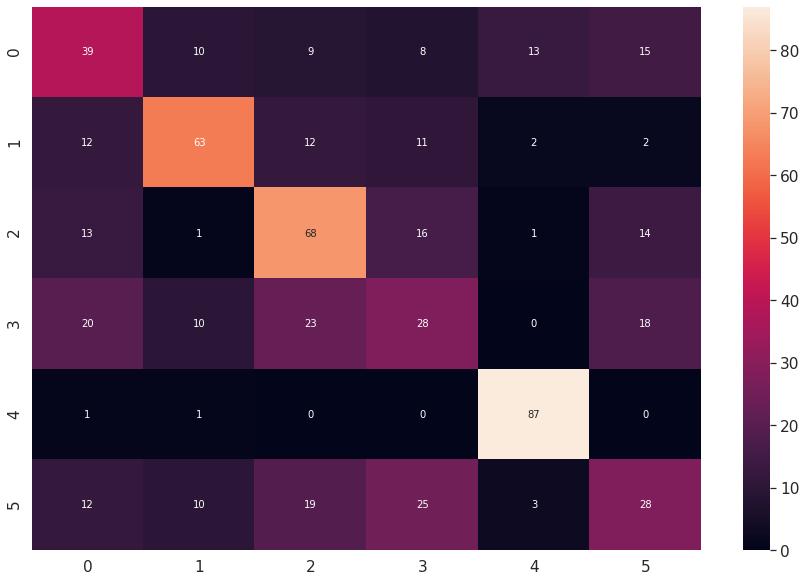

In [126]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 10}) # font size

O modelo do XGBoost com parâmetros refinados produziu a melhor performance até agora, similar ao da random forest, ele obtem scores satisfatórios nas classes 4, 2, 1 e 0. Mas não performa bem na 5 e 3.

In [110]:
print(class_repo)

              precision    recall  f1-score   support

         cyl       0.40      0.41      0.41        94
        hook       0.66      0.62      0.64       102
         lat       0.36      0.29      0.32        97
        palm       0.32      0.28      0.30        99
       spher       0.82      0.98      0.89        89
         tip       0.52      0.60      0.56       113

    accuracy                           0.53       594
   macro avg       0.51      0.53      0.52       594
weighted avg       0.51      0.53      0.52       594



### Stacking com as árvores de decisão

Iremos então aplicar o stacking para os melhores modelos encontrados e verificar se obteremos alguma melhora em relação aos modelos de ensemble testados anteriormente. O comitê a ser realizado será feito com um repeated stratified kfold de 3 repetições e 10 splits sobre a base completa, sem PCA.

(1800, 2501)
>xgb 0.542 (0.031)
>dtree 0.315 (0.034)
>forest 0.458 (0.028)
>stacking 0.551 (0.031)


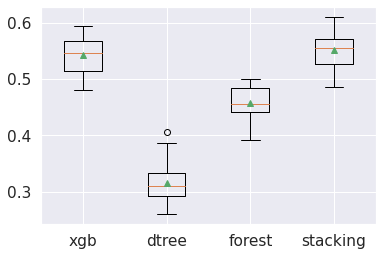

In [128]:
np.random.seed(11)
seed = 11

data = df_all 
print(data.shape) 
data = data.values
X, y = data[:, :-1], data[:, -1]

def get_stacking():
    
  forest = RandomForestClassifier(**forest_best)
  dtree = DecisionTreeClassifier(**dtree_best)
  xgb = XGB.XGBClassifier(**xgb_best)

  # Definindo os modelos base do stacking
  level0 = list()
  level0.append(('xgb', xgb))
  level0.append(('dtree', dtree))
  level0.append(('forest', forest))
  
	# definindo o modelo meta learner 
  level1 = LogisticRegression()
  # definindo o ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
  return model
 

# função retorna os modelos a serem avaliados
def get_models():
 
  forest = RandomForestClassifier(**forest_best)
  dtree = DecisionTreeClassifier(**dtree_best)
  xgb = XGB.XGBClassifier(**xgb_best)


  models = dict()
  models['xgb'] = xgb
  models['dtree'] = dtree
  models['forest'] = forest
  models['stacking'] = get_stacking()
  return models
 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
    scorer = make_scorer(f1_score, average = 'weighted')
    scores = cross_val_score(model, X, y, scoring=scorer, cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

O comitê de stacking com o xgboost, a árvore de decisão e a random forest se mostrou como sendo o melhor modelo, com um f1 score de 0.551 e um desvio padrão de 0.031. 

# Avaliação

Qual o modelo que melhor satisfaz os objetivos do negócio?

Para responder essa pergunta iremos revisar os f1 scores de todos os modelos criados e avaliados.

In [111]:
for key, value in dict_results.items():
    if key.split('_')[0] == "knn":
        print("{}: {}".format(key,value))

knn_baseline: 0.14517162552770102
knn_kfold: 0.13816823386662594
knn_kfold_outlier: 0.13816823386662594
knn_kfold_repeated: 0.08258154149640318


KNN foi o modelo com menor desempenho e, portanto, seria coerente até removê-lo dos comitês criados, pois ele é um preditor bastante fraco e pode tender a diminuir a eficácia dos mesmos. Não se mostrou um modelo útil para esse problema em questão.

In [112]:
for key, value in dict_results.items():
    if key.split('_')[0] == "mlp":
        print("{}: {}".format(key,value))

mlp_baseline: 0.27421832128035867
mlp_kfold: 0.3238840662151783
mlp_kfold_outlier: 0.31504536102856895
mlp_kfold_repeated: 0.3040614367437886


A MLP não teve um destaque quando se tratou do seu desempenho, performando bem parecida com a árvore de decisão, no entanto é importante notar que ela classifica um pouco melhor classes que possuem muitos erros nos outros modelos, por isso foi um algoritmo interessante de se manter nos comitês.

In [113]:
for key, value in dict_results.items():
    if key.split('_')[0] == "dtree":
        print("{}: {}".format(key,value))

dtree_baseline: 0.33647258183054685
dtree_kfold: 0.287373528002665
dtree_kfold_outlier: 0.2913808935865171
dtree_kfold_repeated: 0.3278877767327383


Nossa árvore de decisão não obteve um desempenho sequer médiano, porém foi um salto gigantesco do score inicial do knn. Por classificar bem o rótulo spher pode ser útil como um preditor para ele em particular, possui uma certa capacidade de diferenciar outras classes e por isso também foi um algoritmo interessante de se manter nos comitês.

In [114]:
for key, value in dict_results.items():
    if key.split('_')[0] == "forest":
        print("{}: {}".format(key,value))

forest_baseline: 0.38973640318973224
forest_kfold: 0.3837727344581737
forest_kfold_outlier: 0.3733986220451075
forest_kfold_repeated: 0.4642869684496689


A floresta aleatória foi, dentre os modelos iniciais, o que mais se aproximou de um desempenho de 50%, classificando com maior acurácia 3 dentre os 6 rótulos da base. Portanto foi um algoritmo chave a ser mantido nos comitês.

In [115]:
for key, value in dict_results.items():
    if key.split('_')[0] == "xgb":
        print("{}: {}".format(key,value))

xgb_baseline: 0.49034274679715967
xgb_grid: 0.5166505960203125


O XGBoost é um comitê de boosting de árvores de decisão que foi escolhido para que se tentasse melhorar o desempenho do comitê de stacking dos modelos iniciais. Ele se destacou por ser o primeiro modelo escolhido a ter um desempenho maior que 50% em relação ao f1 score de classificação. 

Além dos modelos standalone iniciais foram treinados 4 comitês: Um comitê de stacking de MLPs, o qual se mostrou bastante lento para treinamento e teste e não houve uma melhora considerável em questão de desempenho ao ser comparado com um modelo standalone de MLP. Um modelo de stacking com todos os modelos iniciais e um modelo de boosting com todos os modelos iniciais, ambos com desempenhos e desvios padrões bastante semelhantes, sendo seus desempenhos melhores do que o de stacking de redes neurais com desvios padrões um pouco acima do mesmo. E, por fim, um comitê apenas com a árvore de decisão, random forest e XGBoost, este que se destacou por obter uma performance superior a 0.5 no f1 score, atingindo 0.551 com um desvio padrão de 0.031, sendo o mesmo o modelo que melhor satisfaz os objetivos da classificação.

## Considerações finais

É visível que o problema é complexo e portanto pode requerer mais testes e variações entre os modelos escolhidos, talvez métodos com stacking com outros tipos de redes neurais em conjunto com árvores de decisão sejam mais eficazes, retirar o modelo do KNN dos comitês também pode ser algo útil. Alguns estudos de investigação de sinais eletromiograficos (sEMG) sugerem ser possível realizar extração de features de cada conjunto de leituras sEMG de modo que a extração de caracterısticas melhora consideravelmente o desempenho do modelo, como visto em Burhan et al. (2016) e Elamvazuthi et al. (2013).

Entretanto, não foi encontrada nenhuma biblioteca ou repositório de código aberto em python que auxiliasse esse tipo de extração de características. Portanto, devido as limitações de tempo do projeto, as quais não permitiriam o estudo para que a criação de funções que auxiliassem nessa fase de tratamento de dados fosse feita, não foi realizada a extração de características para a base em questão. 

Um outro desafio ao se tratar da base escolhida que foi encontrado foi o tempo de execução dos ensembles, da rede neural MLP e do modelo de boosting XGBoost. O script tem um tempo total de execução de em média 26 horas, o que fez com que qualquer mudança paramétrica, de tratamento dos dados ou de funções auxiliares fosse sempre testada em paralelo para que não se gastasse muito tempo executando o script diversas vezes.


Por fim, com essas considerações, é possivel afirmar que mesmo que o modelo final escolhido não tenha um desempenho sequer mediano para um classificador, os resultados desse estudo foram satisfatórios, pois foi possível uma melhora considerável na performance da classificação dos dados utilizando variações paramétricas e comitês diversos.


## Referências

Burhan,  N.,  Kasno,  M.,  e  Ghazali,  R.  (2016).   Feature  extraction  of  surface  electromyography(semg) and signal processing technique in wavelet transform: A review. In2016 IEEE Internati-onal Conference on Automatic Control and Intelligent Systems (I2CACIS), p. 141–146.

lamvazuthi, I., Ling, G. A., Nurhanim, K. A. R. K., Vasant, P., e Parasuraman, S. (2013).  Surfaceelectromyography (semg) feature extraction based on daubechies wavelets.   In2013 IEEE 8thConference on Industrial Electronics and Applications (ICIEA), p. 1492–1495.